Original data shape: (150, 4)
Classes: ['setosa' 'versicolor' 'virginica']


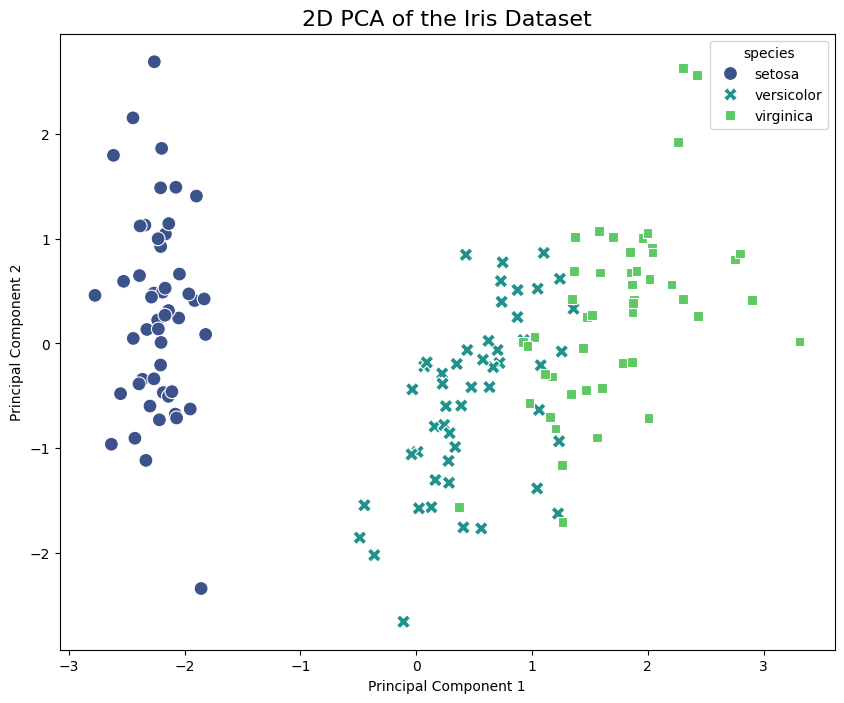

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# --- Step 1: Load a Real-World Dataset ---
# The Iris dataset contains 3 classes (species) of iris flowers and 4 numeric features.
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

print(f"Original data shape: {X.shape}")
print(f"Classes: {target_names}")

# --- Step 2: Scale the Data (Mandatory for Real Data) ---
# Real-world features (like sepal length and petal width) have different scales.
# Scaling is essential before applying PCA.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 3: Apply PCA to Reduce to 2D ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Store results in a DataFrame for easy plotting
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
# Map the numeric target to the actual species names for a better legend
df_pca['species'] = [target_names[i] for i in y]

# --- Step 4: Visualize and "Eyeball" the Clusters 👀 ---
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='species', # Color by the true species to verify the visual clusters
    palette='viridis',
    style='species', # Use different marker styles for clarity
    s=100,
    data=df_pca
)

plt.title('2D PCA of the Iris Dataset', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()